<a href="https://colab.research.google.com/github/sehanchathuranga/BMI-Meter/blob/main/Microsoft_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

import io
from google.colab import files

In [ ]:
uploaded = files.upload()
file_key = next(iter(uploaded))
microsoft = pd.read_csv(r'MicrosoftStock.csv')

Saving MicrosoftStock.csv to MicrosoftStock (2).csv


In [ ]:
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [ ]:
microsoft.shape

(1259, 8)

In [ ]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [ ]:
microsoft.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


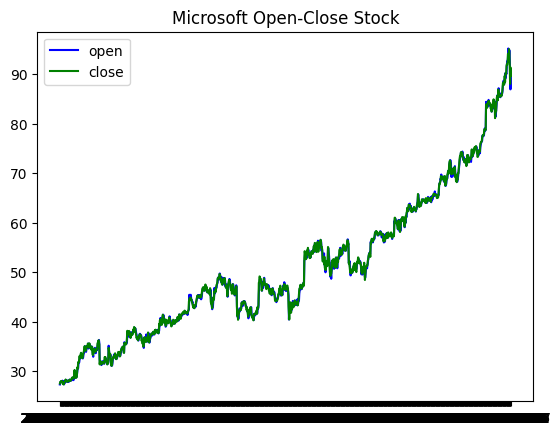

In [ ]:
plt.plot(microsoft['date'], microsoft['open'],color="blue", label="open")
plt.plot(microsoft['date'], microsoft['close'], color="green", label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

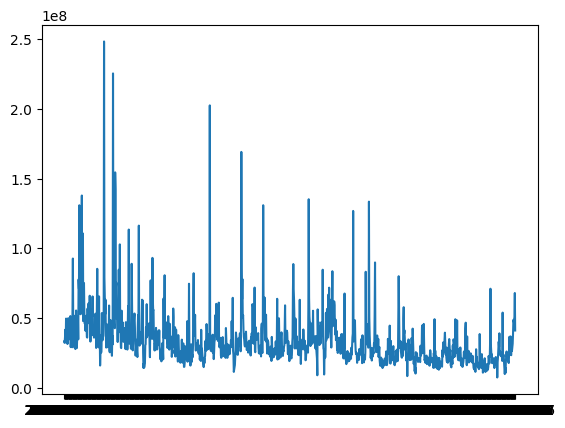

In [ ]:
plt.plot(microsoft['date'], microsoft['volume'])
plt.show()

<ipython-input-13-b1265702b155>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(microsoft.corr(),annot=True,cbar=False)


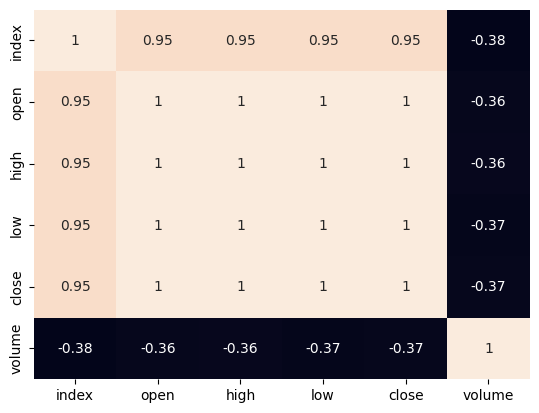

In [ ]:
sns.heatmap(microsoft.corr(),annot=True,cbar=False)
plt.show()

 The plot the Close prices of Microsoft Stock for the time period of 2013 to 2018 which is for a span of 5 years.

Text(0.5, 1.0, 'Microsoft Stock Prices')

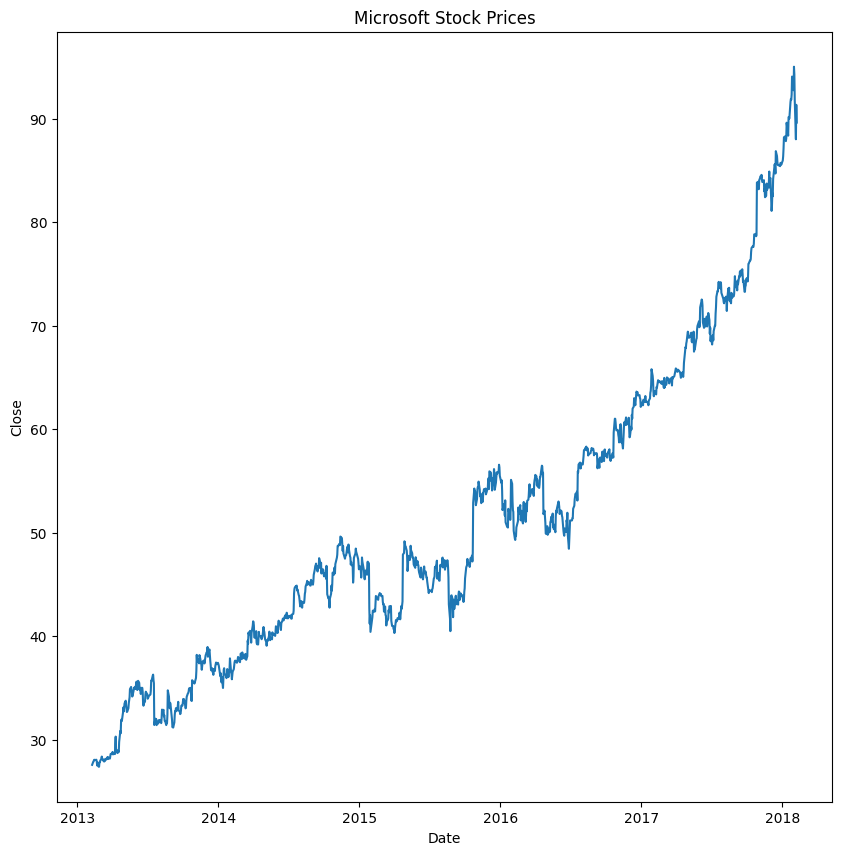

In [ ]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date'] > datetime(2013, 1, 1)) & (microsoft['date'] < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [ ]:
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * 0.95))

# Scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train),\
                   np.array(y_train)
X_train = np.reshape(x_train,
                     (x_train.shape[0],
                      x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=RootMeanSquaredError())

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
36/36 [==============================] - 10s 67ms/step - loss: 0.1874 - root_mean_squared_error: 0.2985
Epoch 2/20
36/36 [==============================] - 2s 50ms/step - loss: 0.1033 - root_mean_squared_error: 0.1391
Epoch 3/20
36/36 [==============================] - 2s 64ms/step - loss: 0.0943 - root_mean_squared_error: 0.1286
Epoch 4/20
36/36 [==============================] - 2s 65ms/step - loss: 0.0954 - root_mean_squared_error: 0.1275
Epoch 5/20
36/36 [==============================] - 2s 52ms/step - loss: 0.0918 - root_mean_squared_error: 0.1233
Epoch 6/20
36/36 [==============================] - 2s 53ms/step - loss: 0.0860 - root_mean_squared_error: 0.1147
Epoch 7/20
36/36 [==============================] - 2s 55ms/step - loss: 0.0911 - root_mean_squared_error: 0.1214
Epoch 8/20
36/36 [==============================] - 2s 50ms/step - loss: 0.0820 - root_mean_squared_error: 0.1095
Epoch 9/20
36/36 [==============================] - 2s 58ms/step - loss: 0.0819 - root_

We got 0.0739 mean absolute error, which is close to the perfect error score.

In [ ]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0], x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 [==============================] - 1s 19ms/step


<ipython-input-24-66bf7958377f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


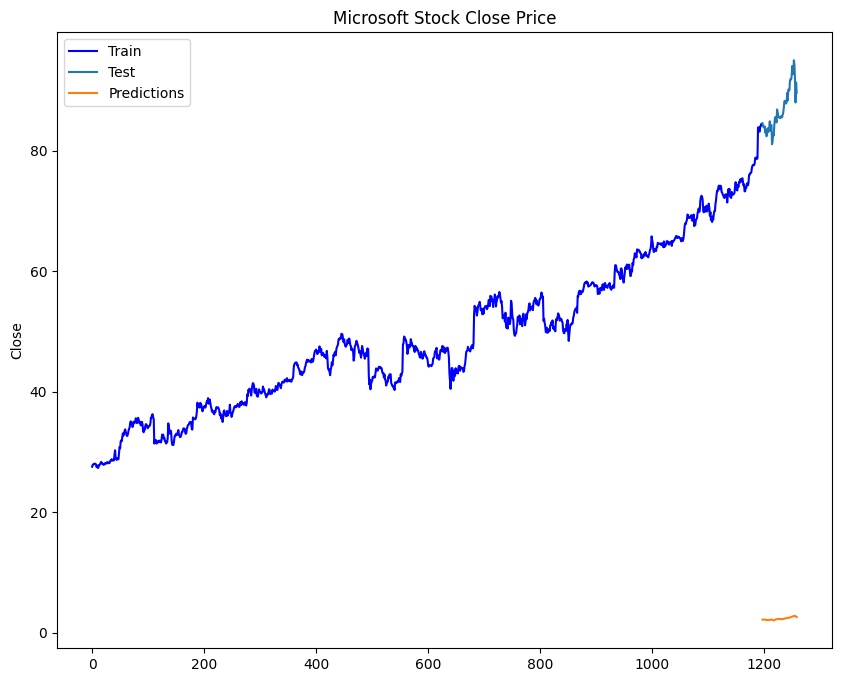

In [ ]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])